# Plotting Results

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle

RESULTPATH = '../results/'
DATAPATH = '../datasets/'

In [225]:
train = pd.read_csv(DATAPATH + 'train.csv')
test = pd.read_csv(DATAPATH + 'test.csv')
# train_metadata = pd.read_csv(DATAPATH + 'train_metadata.csv', encoding="latin-1")

train.columns = ['movie_id', 'customer_id', 'rating', 'date']
test.columns  = ['movie_id', 'customer_id', 'rating', 'date']

df = train.pivot_table(index='customer_id', \
                           columns='movie_id', values='rating', aggfunc=np.mean).fillna(0)
A = df.to_numpy().copy()

In [238]:
train

,movie_id,customer_id,rating,date
0,1262,24294,4,2004-07-04
1,1810,18187,3,2004-03-12
2,2000,23573,5,2005-01-20
3,3312,25907,1,2005-05-12
4,3371,21487,5,2004-05-06
...,...,...,...,...
999995,8711,8766,4,2005-01-04
999996,9384,28277,3,2005-06-01
999997,9981,24830,1,2004-08-04
999998,10236,32504,5,2003-06-10


In [226]:
test

,movie_id,customer_id,rating,date
0,11279,5858,?,2005-05-07
1,12140,5202,?,2004-01-24
2,12191,18818,?,2005-03-27
3,12299,10021,?,2005-09-07
4,12605,12449,?,2005-08-03
...,...,...,...,...
249994,16459,11043,?,2003-10-15
249995,16535,7063,?,2003-02-12
249996,16707,32275,?,2004-07-29
249997,17339,10728,?,2005-07-15


In [239]:
test_df = test.to_numpy().copy()
print(test_df.shape)
test_df
# df_df = pd. DataFrame(data=test_df,columns=['movie_id', 'customer_id', 'rating', 'date'])
# df_df

(249999, 4)


array([[11279, 5858, '?', '2005-05-07'],
       [12140, 5202, '?', '2004-01-24'],
       [12191, 18818, '?', '2005-03-27'],
       ...,
       [16707, 32275, '?', '2004-07-29'],
       [17339, 10728, '?', '2005-07-15'],
       [17580, 5600, '?', '2005-06-18']], dtype=object)

In [231]:
for tst in range(test_df.shape[0]):
    mvid  = test_df[tst,0]
    cstid = test_df[tst,1]
    test_df[tst,3] = pred_ratings[cstid, mvid]
    

In [223]:
qry=test[(test['movie_id']==11279) & (test['customer_id']==5858)]
qry['rating']=1
qry

/Users/Maryam/anaconda3/envs/DeepLearningEEG/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,movie_id,customer_id,rating,date
0,11279,5858,1,2005-05-07


In [163]:
def set_fonts():
    from matplotlib.font_manager import FontProperties
    font = FontProperties()
    font.set_family('serif')
    font.set_name('Calibri')
    return font

def plot_scores(tr, ts, method, tst_prc):
    font=set_fonts();
  
    fig, ax = plt.subplots(figsize=(8,8))
    plt.tight_layout()
    ax.plot(np.mean(tr,axis=0), label='Train', linewidth=4)
    ax.plot(np.mean(ts,axis=0), label='Test', linewidth=4)

    plt.tight_layout()
    plt.xlabel('Different k',  fontproperties=font, fontsize=22, fontweight='bold')
    plt.ylabel(method, fontproperties=font, fontsize=22, fontweight='bold')#, labelpad=16,)
    plt.title('Cross validation tuning using %s percent test data - Average over 100 epochs' %(tst_prc), fontproperties=font, fontweight='bold', fontsize=16)

    plt.legend(fontsize=11)
    plt.tight_layout()
    
def plot_eigengaps(eg, title):
    font=set_fonts();
  
    fig, ax = plt.subplots(figsize=(5,5))
    plt.tight_layout()    
    plt.scatter(x=np.arange(eg.shape[0]), y=eg) 

    plt.tight_layout()
    plt.ylabel('Eigengaps', fontproperties=font, fontsize=22, fontweight='bold')#, labelpad=16,)
    plt.title(title, fontproperties=font, fontweight='bold', fontsize=16)
    
    plt.legend(fontsize=11)
    plt.tight_layout()

In [100]:
# Save labels
f_tr = 'mc_RMSE_tr_mean_col_cosine_similarity_0.1_epch95.npy'
f_ts = 'mc_RMSE_ts_mean_col_cosine_similarity_0.1_epch95.npy'

fn_str = RESULTPATH + f_tr
with open(fn_str, 'rb') as f:
    tr1=pickle.load(f)
    
fn_str = RESULTPATH + f_ts
with open(fn_str, 'rb') as f:
    ts1=pickle.load(f)
    
##############
f_tr = 'mc_RMSE_tr_mean_col_cosine_similarity_0.25_epch95.npy'
f_ts = 'mc_RMSE_ts_mean_col_cosine_similarity_0.25_epch95.npy'

fn_str = RESULTPATH + f_tr
with open(fn_str, 'rb') as f:
    tr2=pickle.load(f)
    
fn_str = RESULTPATH + f_ts
with open(fn_str, 'rb') as f:
    ts2=pickle.load(f)

##############
f_tr = 'mc_cnt_corr_tr_mean_col_cosine_similarity_0.1_epch95.npy'
f_ts = 'mc_cnt_corr_ts_mean_col_cosine_similarity_0.1_epch95.npy'

fn_str = RESULTPATH + f_tr
with open(fn_str, 'rb') as f:
    tr3=pickle.load(f)
    
fn_str = RESULTPATH + f_ts
with open(fn_str, 'rb') as f:
    ts3=pickle.load(f)
    
##############
f_tr = 'mc_cnt_corr_tr_mean_col_cosine_similarity_0.25_epch95.npy'
f_ts = 'mc_cnt_corr_ts_mean_col_cosine_similarity_0.25_epch95.npy'

fn_str = RESULTPATH + f_tr
with open(fn_str, 'rb') as f:
    tr4=pickle.load(f)
    
fn_str = RESULTPATH + f_ts
with open(fn_str, 'rb') as f:
    ts4=pickle.load(f)
    

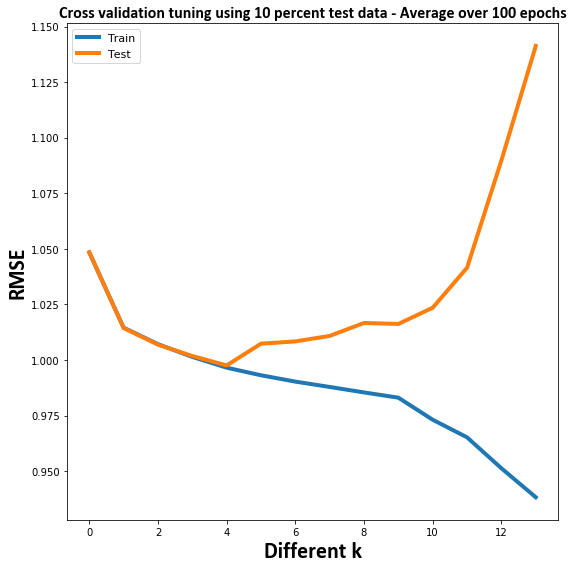

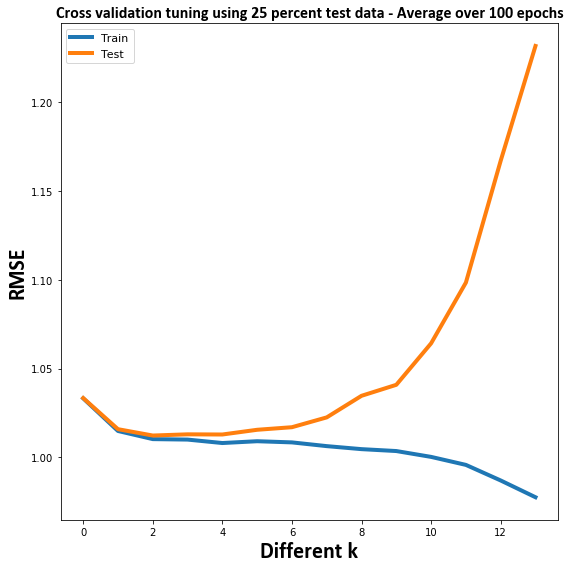

In [101]:
# kk=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40]
plot_scores(tr1, ts1, 'RMSE', '10')
plot_scores(tr2, ts2, 'RMSE', '25')

In [114]:
# plot_scores(tr3, ts3, 'Count Correct Pred.', '10')
# plot_scores(tr4, ts4, 'Count Correct Pred.', '25')

In [115]:
# Save labels
n_k = [3, 4, 5, 10]
RESULTPATH = '../results/mc_new/'
n_epochs=95
f_tr = 'mc_RMSE_tr_mean_col_cosine_similarity_0.1_epch%s.npy' %(n_epochs)
f_ts = 'mc_RMSE_ts_mean_col_cosine_similarity_0.1_epch%s.npy' %(n_epochs)

fn_str = RESULTPATH + f_tr
with open(fn_str, 'rb') as f:
    tr1=pickle.load(f)
    
fn_str = RESULTPATH + f_ts
with open(fn_str, 'rb') as f:
    ts1=pickle.load(f)
    
# ##############
f_tr = 'mc_RMSE_tr_mean_col_cosine_similarity_0.25_epch%s.npy' %(n_epochs)
f_ts = 'mc_RMSE_ts_mean_col_cosine_similarity_0.25_epch%s.npy' %(n_epochs)

fn_str = RESULTPATH + f_tr
with open(fn_str, 'rb') as f:
    tr2=pickle.load(f)
    
fn_str = RESULTPATH + f_ts
with open(fn_str, 'rb') as f:
    ts2=pickle.load(f)

##############
f_tr = 'mc_cnt_corr_tr_mean_col_cosine_similarity_0.1_epch%s.npy' %(n_epochs)
f_ts = 'mc_cnt_corr_ts_mean_col_cosine_similarity_0.1_epch%s.npy' %(n_epochs)

fn_str = RESULTPATH + f_tr
with open(fn_str, 'rb') as f:
    tr3=pickle.load(f)
    
fn_str = RESULTPATH + f_ts
with open(fn_str, 'rb') as f:
    ts3=pickle.load(f)
    
##############
f_tr = 'mc_cnt_corr_tr_mean_col_cosine_similarity_0.25_epch%s.npy' %(n_epochs)
f_ts = 'mc_cnt_corr_ts_mean_col_cosine_similarity_0.25_epch%s.npy' %(n_epochs)

fn_str = RESULTPATH + f_tr
with open(fn_str, 'rb') as f:
    tr4=pickle.load(f)
    
fn_str = RESULTPATH + f_ts
with open(fn_str, 'rb') as f:
    ts4=pickle.load(f)
    

(100, 14)


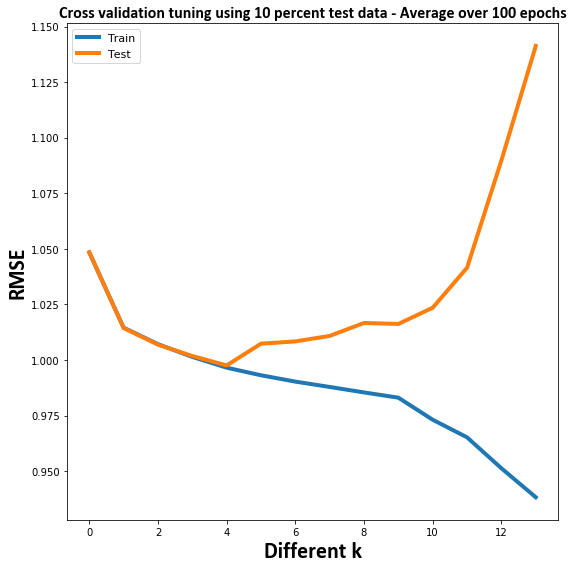

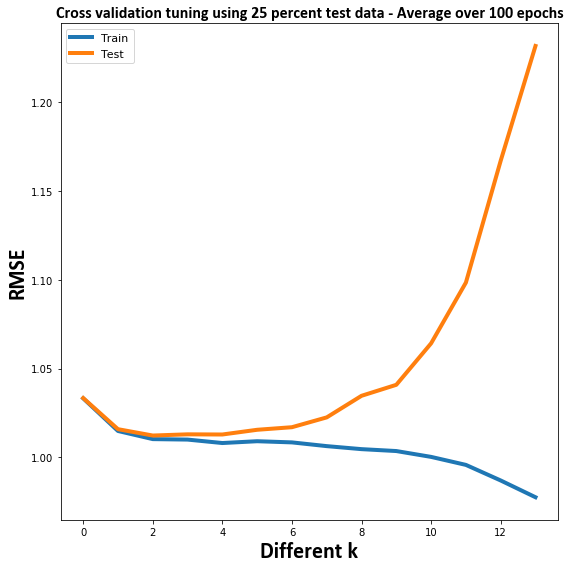

In [116]:
# kk=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40]
print(tr1.shape)
plot_scores(tr1, ts1, 'RMSE', '10')
plot_scores(tr2, ts2, 'RMSE', '25')

In [117]:
# plot_scores(tr3, ts3, 'Count Correct Pred.', '10')
# plot_scores(tr3, ts3, 'Count Correct Pred.', '25')

In [198]:
# Save labels
from sklearn.cluster import KMeans, MiniBatchKMeans, SpectralClustering

# n_k = [3, 4, 5, 10]
RESULTPATH = '../results/results/'
n_epochs=5
f_tr = 'sc_MSE_tr_U_mean_col_cosine_similarity_0.25_epch%s.npy' %(n_epochs)
f_ts = 'sc_MSE_ts_U_mean_col_cosine_similarity_0.25_epch%s.npy' %(n_epochs)

fn_str = RESULTPATH + f_tr
with open(fn_str, 'rb') as f:
    tr1=pickle.load(f)
    tr1=tr1[:n_epochs]
# plt.plot(tr1)
# plt.plot(ts1)
fn_str = RESULTPATH + f_ts
with open(fn_str, 'rb') as f:
    ts1=pickle.load(f)
    ts1=ts1[:n_epochs]
    
# # ##############
f_tr = 'sc_RMSE_tr_U_mean_col_cosine_similarity_0.25_epch%s.npy' %(n_epochs)
f_ts = 'sc_RMSE_ts_U_mean_col_cosine_similarity_0.25_epch%s.npy' %(n_epochs)

fn_str = RESULTPATH + f_tr
with open(fn_str, 'rb') as f:
    tr2=pickle.load(f)
    tr2=tr2[:n_epochs]
    
fn_str = RESULTPATH + f_ts
with open(fn_str, 'rb') as f:
    ts2=pickle.load(f)
    ts2=ts2[:n_epochs]

# ##############
f_tr = 'sc_cnt_corr_tr_mean_col_cosine_similarity_0.25_epch%s.npy' %(n_epochs)
f_ts = 'sc_cnt_corr_ts_mean_col_cosine_similarity_0.25_epch%s.npy' %(n_epochs)

fn_str = RESULTPATH + f_tr
with open(fn_str, 'rb') as f:
    tr3=pickle.load(f)
    tr3=tr3[:n_epochs]
    
fn_str = RESULTPATH + f_ts
with open(fn_str, 'rb') as f:
    ts3=pickle.load(f)
    ts3=ts3[:n_epochs]
print(tr3)
print(ts3)
# plt.scatter(x=np.arange(tr3.shape[0]),y=tr3)
# plt.scatter(x=np.arange(ts3.shape[0]),y=ts3)
# ##############
f_tr = 'sc_prc_corr_tr_mean_col_cosine_similarity_0.25_epch%s.npy' %(n_epochs)
f_ts = 'sc_prc_corr_ts_mean_col_cosine_similarity_0.25_epch%s.npy' %(n_epochs)

fn_str = RESULTPATH + f_tr
with open(fn_str, 'rb') as f:
    tr4=pickle.load(f)
    
fn_str = RESULTPATH + f_ts
with open(fn_str, 'rb') as f:
    ts4=pickle.load(f)  
# ##############
n_epochs=5

f1 = 'sc_eigengap_mean_col_cosine_similarity_0.25_k5_epch%s.npy' %(n_epochs)
f2 = 'sc_eigengap_mean_col_cosine_similarity_0.25_k50_epch%s.npy' %(n_epochs)
f3 = 'sc_eigengap_mean_col_cosine_similarity_0.25_k100_epch%s.npy' %(n_epochs)

fn_str = RESULTPATH + f1
with open(fn_str, 'rb') as f:
    eg1=pickle.load(f)
    
fn_str = RESULTPATH + f2
with open(fn_str, 'rb') as f:
    eg2=pickle.load(f)

fn_str = RESULTPATH + f3
with open(fn_str, 'rb') as f:
    eg3=pickle.load(f)

[[250865. 250865. 250865.]
 [250723. 250723. 250723.]
 [250763. 250763. 250763.]
 [250759. 250759. 250759.]
 [250630. 250630. 250630.]]
[[83488. 83488. 83488.]
 [83630. 83630. 83630.]
 [83590. 83590. 83590.]
 [83594. 83594. 83594.]
 [83723. 83723. 83723.]]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


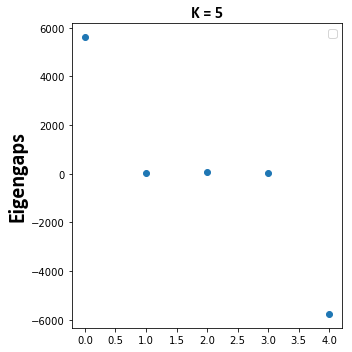

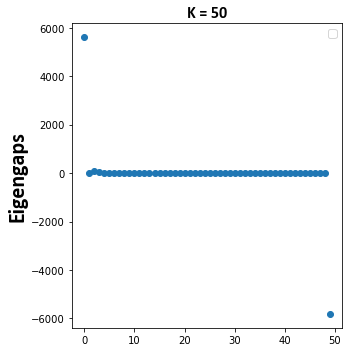

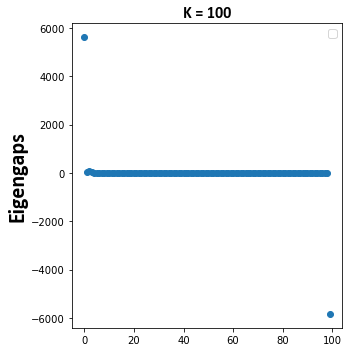

In [190]:
eg=eg1[0:]
title = 'K = 5'
plot_eigengaps(eg, title)

eg=eg2[0:]
title = 'K = 50'
plot_eigengaps(eg, title)

eg=eg3[0:]
title = 'K = 100'
plot_eigengaps(eg, title)

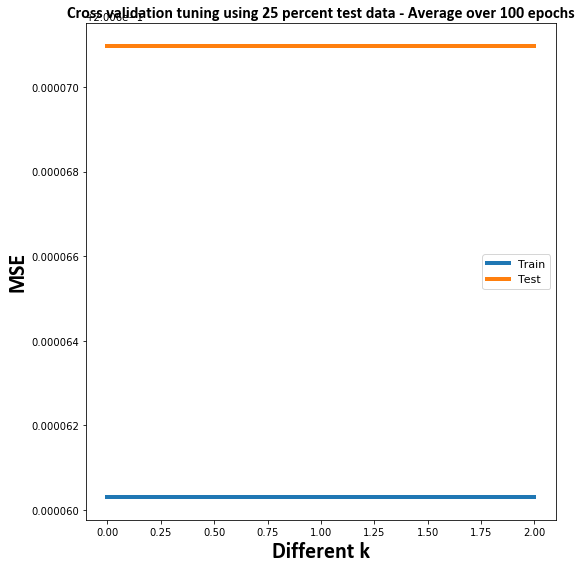

In [191]:
# plot_scores(tr3, ts3, 'Count Correct Pred.', '10')
plot_scores(tr4, ts4, 'MSE', '25')